In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.9666666666666667


# Task 1

In [155]:
def sigmoid(output):
    z = 1/(1+np.exp(-output))
    return z

def gradient_descent(x, y, lr, n_iterations):
    beta = [1,1]
    n = len(x)
    for i in range(n_iterations):
        output = beta[0] + beta[1]*x
        z = sigmoid(output)
        b1 = np.sum(x*(np.exp(z)/(1+np.exp(z))-y))/len(x)
        b0 = np.sum(np.exp(z)/(1+np.exp(z))-y)/len(x)
        beta[1] = beta[1] - lr*b1
        beta[0] = beta[0] - lr*b0
    return beta

2 0.68


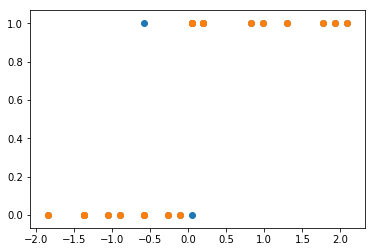

In [202]:
import numpy as np
from sklearn import preprocessing

X = np.asarray([iris.data[i,:1] for i in range(len(iris.data)) if iris.target[i] != 2])
X_scaled = preprocessing.scale(X)
y = np.asarray([i for i in iris.target if i != 2])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
beta = gradient_descent(X_train,y_train, 0.0001,100)

z = beta[0]+beta[1]*X_test
y_pred = sigmoid(z)
besterr = 100
bestpred = [] 
bestt = 0.5
for i in range(1,99):
    pred = []
    for j in y_pred:
        if j > i/100:
            pred.append(1)
        else:
            pred.append(0)
    err = sum(abs(y_test-pred))
    if err < besterr:
        besterr = err
        bestpred = pred
        bestt = i/100
plt.scatter(X_test,y_test)
plt.scatter(X_test, bestpred)
plt.show
print(besterr, bestt)

In [203]:
true_pos = 0
false_pos = 0
false_neg = 0
for i in range(len(y_test)):
    if y_test[i] == 1 and bestpred[i] == 1:
        true_pos += 1
    elif y_test[i] == 0 and bestpred[i] == 1:
        false_pos += 1
    elif y_test[i] == 1 and bestpred[i] == 0:
        false_neg += 1
print("Precision ", true_pos/(true_pos+false_pos))
print("Recall ", true_pos/(true_pos+false_neg))

Precision  0.9090909090909091
Recall  0.9090909090909091


# Task 2

In [2]:
f = open('/Users/victor/Innopolis/Master Degree/Intro Machine Learning/Lab 3/ks-projects-201801.csv','r')

In [3]:
import pandas
data = pandas.read_csv(f, sep=',')
data

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [258]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

data = data.loc[:,['state', 'backers']]
ds = data.replace('canceled', np.nan)
ds = ds.dropna()
X = ds.loc[:,['backers']]
y = ds.loc[:, ['state']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Precision = ",precision_score(y_test.values, y_pred, average = 'micro'))
print("Recall = ", recall_score(y_test.values, y_pred, average='micro'))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision =  0.7719522779763743
Recall =  0.7719522779763743


In [259]:
X = data.loc[:,['backers']]
y = data.loc[:,['state']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Precision = ",precision_score(y_test.values, y_pred, average = 'micro'))
print("Recall = ", recall_score(y_test.values, y_pred, average='micro'))


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision =  0.6929343879154398
Recall =  0.6929343879154398
